# Segmentación de los clientes que tienen mayor frecuencia de compras

Este proyecto emplea los datos financieros de un grupo de clientes en donde se pueden visualizar varias variables financieras como la frecuencia de compras durante los últimos seis meses, la cual se analiza junto a la variable relacionada con la identificación de cada cliente.

## Objetivos

* Realizar la segmentación de los clientes que poseen una mayor frecuencia de compra.
* Realizar el preprocesamiento de datos para luego aplicar los modelos de cluster.
* Aplicar los modelos de k-means, cluster jerárquico y DBSCAN para así escoger el de mejor resultado.

In [2]:
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics

## Visualización de los datos con pandas:

In [3]:
df = pd.read_csv("Customer_Dataset.csv", encoding="ISO-8859-1")
pd.set_option('display.max_columns', None)
print(df.head(550))
pd.set_option('display.max_rows', None)

    CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    C10001    40.900749           0.818182      95.40              0.00   
1    C10002  3202.467416           0.909091       0.00              0.00   
2    C10003  2495.148862           1.000000     773.17            773.17   
3    C10004  1666.670542           0.636364    1499.00           1499.00   
4    C10005   817.714335           1.000000      16.00             16.00   
..      ...          ...                ...        ...               ...   
545  C10569  5178.179489           1.000000    3937.59           2606.42   
546  C10570   531.455619           1.000000    6300.40           6300.40   
547  C10571   263.699200           1.000000    1856.64              0.00   
548  C10572   492.070146           0.800000    4924.41           4924.41   
549  C10573  1034.660626           0.833333    1308.11           1308.11   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    

## Tamaño del conjunto de datos:

In [4]:
df.shape

(8950, 18)

## Tipos de datos en cada variable:

In [5]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQ               float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

## Renombrar variables:

In [6]:

# Renombramos las variables

rempl = [("CUST_ID", "CUSTOMER_ID"), 
          
          
        ]

# Creamos una copia del dataset
df_1 = df.copy()

# Renombramos las variables en la copia
for old, new in rempl:
    df_1.rename(columns={old: new}, inplace=True)

# Imprimimos el dataset
print(df_1.head())

  CUSTOMER_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      C10001    40.900749           0.818182      95.40              0.00   
1      C10002  3202.467416           0.909091       0.00              0.00   
2      C10003  2495.148862           1.000000     773.17            773.17   
3      C10004  1666.670542           0.636364    1499.00           1499.00   
4      C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQ  PURCHASES_INSTALLMENTS_FREQUENCY  \
0               0.000000                          0.083333   
1               0.0000

## Determinación de valores nulos: 

In [7]:
# valores nulos

(
    df_1
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUSTOMER_ID                           0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQ                 0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

## Eliminación de los valores nulos en la variable CREDIT_LIMIT:

In [8]:
# se elimina el valor nulo de la variable

df_2 = df_1.dropna(subset=['CREDIT_LIMIT'])

In [9]:
# valores nulos

(
    df_2
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

MINIMUM_PAYMENTS                    313
CUSTOMER_ID                           0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
CREDIT_LIMIT                          0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQ                 0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

## Visualización de la distribución de densidad para las variables de frecuencia de compra y la variable límite de crédito:

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

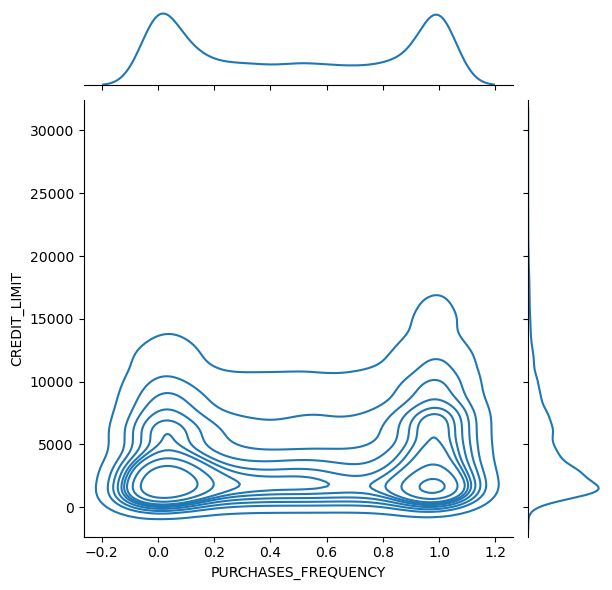

In [10]:
# Graficar el joinplot con 2 variables
sns.jointplot(data=df_2, x='PURCHASES_FREQUENCY', y='CREDIT_LIMIT', kind='kde')

## Convertir en números consecutivos la variable de identificación del cliente:

In [11]:
# convierto en numeros consecutivos la variable CUSTOMER_ID

# Crear una variable para almacenar el índice de la fila
row_index = np.arange(len(df_2)) + 1

# Asignar el índice a la variable CUSTOMER_ID
df_2['CUSTOMER_ID'] = row_index

# Imprimir el dataset modificado
print(df_2.tail())

      CUSTOMER_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945         8945   28.493517           1.000000     291.12              0.00   
8946         8946   19.183215           1.000000     300.00              0.00   
8947         8947   23.398673           0.833333     144.40              0.00   
8948         8948   13.457564           0.833333       0.00              0.00   
8949         8949  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQ  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945               0.000000                  

C:\Users\Windows\AppData\Local\Temp\ipykernel_37568\1451470544.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['CUSTOMER_ID'] = row_index


## Dejo solo las variables de mi interés (identificación cliente y frecuencia de compras):

In [13]:
# dejo solo las variables de mi interes en df_3

#Crear una copia de df_2
df_3 = df_2.copy()

# Seleccionar las 2 variables que deseas dejar
df_3 = df_2[['CUSTOMER_ID', 'PURCHASES_FREQUENCY']]

# Imprimir el DataFrame
print(df_3.head(10))

   CUSTOMER_ID  PURCHASES_FREQUENCY
0            1             0.166667
1            2             0.000000
2            3             1.000000
3            4             0.083333
4            5             0.083333
5            6             0.666667
6            7             1.000000
7            8             1.000000
8            9             0.333333
9           10             0.166667


## Explorando los máximos y mínimos de las variables de interés:

In [14]:
# minimo de PURCHASES_FREQUENCY

df_3['PURCHASES_FREQUENCY'].min()

0.0

In [15]:
# max de PURCHASES_FREQUENCY

df_3['PURCHASES_FREQUENCY'].max()

1.0

## Verificación de si existen duplicados en las filas para las variables de mi interés:

In [16]:
# Determina los valores duplicados par las filas
duplicates = df_3.duplicated()

# Imprime el dataframe de valores duplicados
print(duplicates.head(10))

# Suma los valores duplicados
print(duplicates.sum())

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool
0


## Verificación de errores de entrada:
* Confirmo que ambas variables son de tipo numérico


In [17]:
# se verifican errores de entrada si los datos no son float

# Escoge las columnas CUSTOMER_ID y PURCHASES_FREQUENCY
df_4 = df_3[['CUSTOMER_ID', 'PURCHASES_FREQUENCY']]

# Verifica si los valores de las columnas "CUSTOMER_ID" y "PURCHASES_FREQUENCY" son float64
def is_float64(column):
    return column.dtype == float

for col in ['CUSTOMER_ID', 'PURCHASES_FREQUENCY']:
    if not is_float64(df_4[col]):
        # Si no son float64, imprime el error
        print(f"Aviso: La columna {col} no es float64")

Aviso: La columna CUSTOMER_ID no es float64


## Valores atípicos para las variables de interés:
* No hay presencia de valores atípicos extremos


<Axes: xlabel='CUSTOMER_ID'>

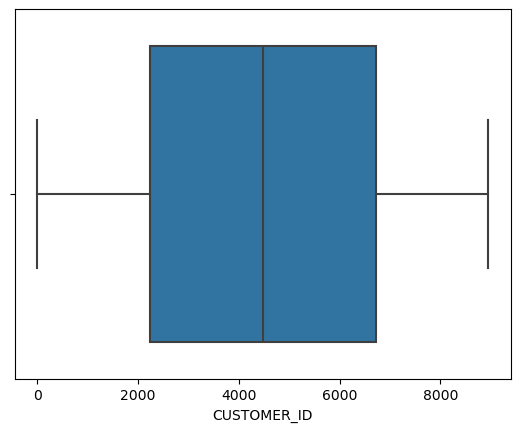

In [18]:
# valores atipicos CUSTOMER_ID
    

sns.boxplot(data=df_3, x="CUSTOMER_ID", palette="tab10", showfliers=True) # showflier muestra los puntos de valores atipicos

<Axes: xlabel='PURCHASES_FREQUENCY'>

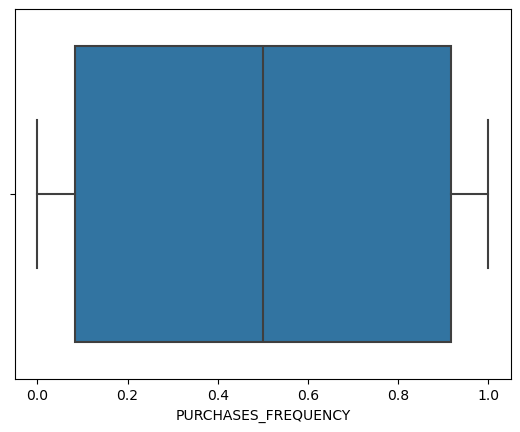

In [19]:
# valores atipicos PURCHASES_FREQUENCY
    
    
sns.boxplot(data=df_3, x="PURCHASES_FREQUENCY", palette="tab10", showfliers=True)

## Confirmación de tipo de datos para las variables de interés:

In [20]:
# se verifican errores de entrada si los datos no son flot
df_3.dtypes

CUSTOMER_ID              int32
PURCHASES_FREQUENCY    float64
dtype: object

## Se observa que no existe indicios de correlación fuerte entre las variables de interés:

In [21]:
# correlaciones
df_3[['CUSTOMER_ID', 'PURCHASES_FREQUENCY']].corr()

,CUSTOMER_ID,PURCHASES_FREQUENCY
CUSTOMER_ID,1.000000,-0.021117
PURCHASES_FREQUENCY,-0.021117,1.000000


## Matriz de correlaciones: 

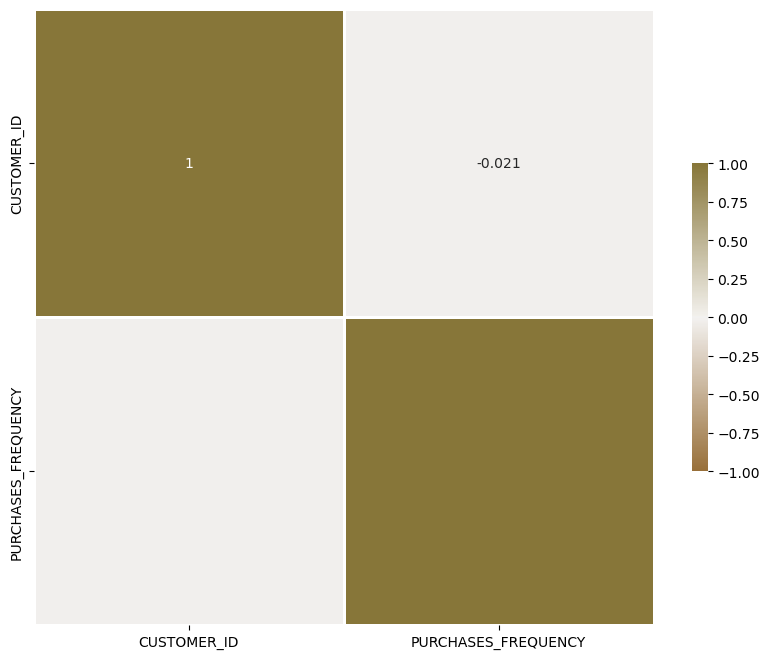

In [22]:
# matriz de correlaciones

import seaborn as sns
import matplotlib.pyplot as plt

# Define el tamaño de la figura
plt.figure(figsize=(10, 8)) # Ancho: 10 pulgadas, Alto: 8 pulgadas

# Plotea la matriz
sns.heatmap(data=df_3[['CUSTOMER_ID', 'PURCHASES_FREQUENCY']].corr(),
            cmap=sns.diverging_palette(50, 430, as_cmap=True),
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.8,
            cbar_kws={"shrink": 0.5},
            annot=True)

# Muestra el gráfico
plt.show()

## Distribución de densidad no normal:

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='Density'>

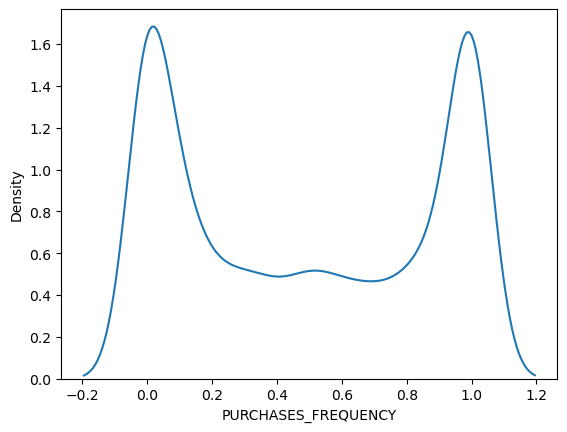

In [23]:
sns.kdeplot(df_3["PURCHASES_FREQUENCY"])

## Selección de la variable de identificación de cliente:

In [24]:
# Seleccionamos la variable 1
raw_0 = df_3.iloc[:, 0]

In [25]:
print(raw_0.head(10))

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: CUSTOMER_ID, dtype: int32


## Escalamiento min-max, normalización y visualización  para comparar los datos sin normalizar ni escalar con los datos normalizados y escalados:

In [26]:

# Escalamiento max-min
max_raw = max(raw_0)
min_raw = min(raw_0)
scaled_0 = (2*raw_0 - max_raw -min_raw)/(max_raw - min_raw) # para que esten los datos entre -1 y 1

# Normalización Z-score
avg = np.average(raw_0)
std = np.std(raw_0)
z_scaled_0 = (raw_0 - avg)/std

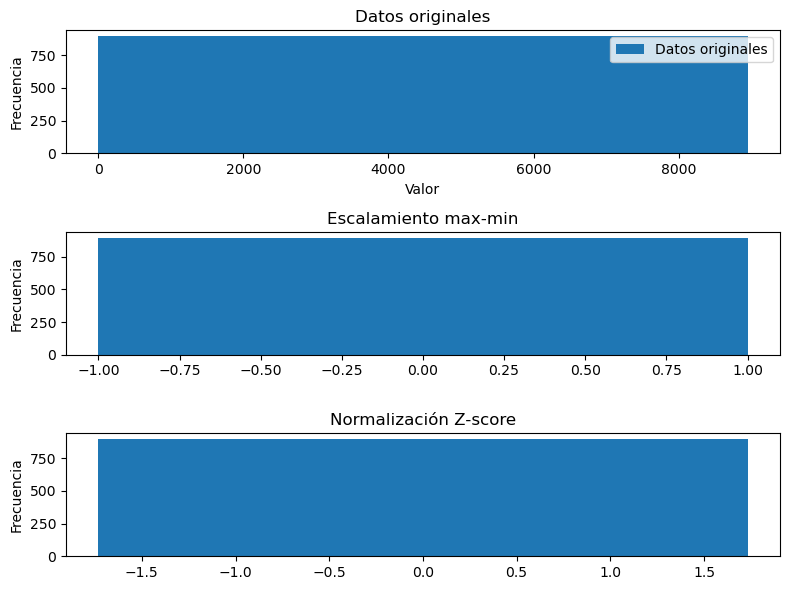

In [27]:
# Histogramas
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1)

# Gráfico 1
ax1 = fig.add_subplot(gs[0])
ax1.hist(raw_0, label="Datos originales")
ax1.set_title("Datos originales")
ax1.set_ylabel("Frecuencia")

# Gráfico 2
ax2 = fig.add_subplot(gs[1])
ax2.hist(scaled_0, label="Escalamiento max-min")
ax2.set_title("Escalamiento max-min")
ax2.set_ylabel("Frecuencia")

# Gráfico 3
ax3 = fig.add_subplot(gs[2])
ax3.hist(z_scaled_0, label="Normalización Z-score")
ax3.set_title("Normalización Z-score")
ax3.set_ylabel("Frecuencia")

ax1.set_xlabel("Valor")
ax1.legend()

plt.tight_layout()
plt.show()

## Distribución de densidad para la variable identificacion cliente:
* no se observan alteraciones en la visualización ya que los datos son números consecutivos

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CUSTOMER_ID', ylabel='Density'>

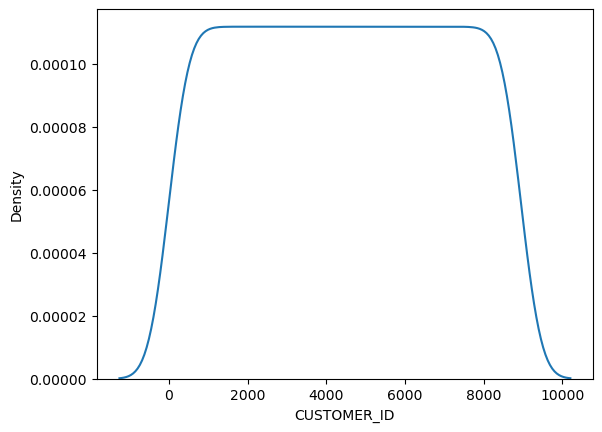

In [28]:
sns.kdeplot(df_3["CUSTOMER_ID"])

## Datos estadísticos de la variable identificación del cliente: 

In [29]:
stats_0 = df_3.CUSTOMER_ID.describe()
stats_0

count    8949.000000
mean     4475.000000
std      2583.498113
min         1.000000
25%      2238.000000
50%      4475.000000
75%      6712.000000
max      8949.000000
Name: CUSTOMER_ID, dtype: float64

## Selección de la variable de frecuencia de compras:
* escalamiento min-max, normalización y visualización  para comparar los datos sin normalizar ni escalar con los datos normalizados y escalados:


In [30]:
# Seleccionamos la variable 2
raw_1 = df_3.iloc[:, 1]

# Escalamiento max-min
max_raw = max(raw_1)
min_raw = min(raw_1)
scaled_1 = (2*raw_1 - max_raw -min_raw)/(max_raw- min_raw) # para que esten los datos entre -1 y 1

# Normalización Z-score
avg = np.average(raw_1)
std = np.std(raw_1)
z_scaled_1 = (raw_1 - avg)/std

In [31]:
print(raw_1.head(10))

0    0.166667
1    0.000000
2    1.000000
3    0.083333
4    0.083333
5    0.666667
6    1.000000
7    1.000000
8    0.333333
9    0.166667
Name: PURCHASES_FREQUENCY, dtype: float64


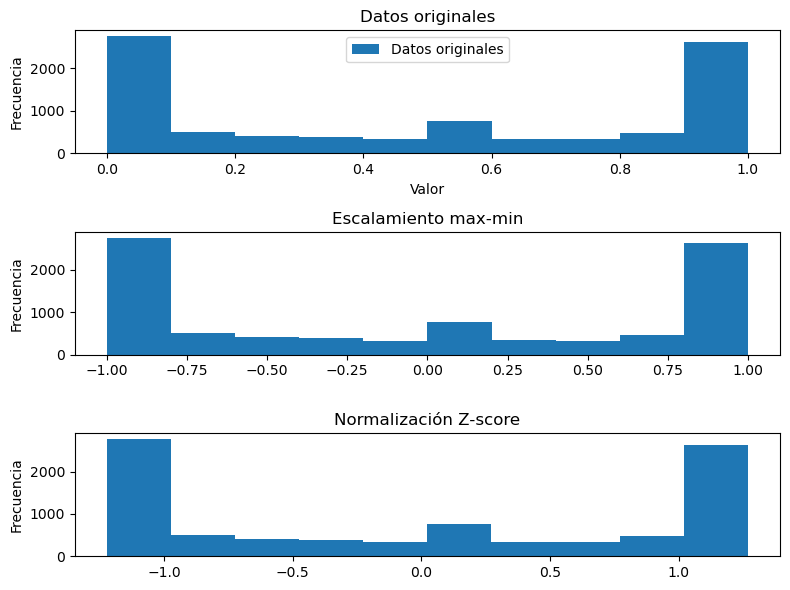

In [32]:
# Histogramas
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1)

# Gráfico 1
ax1 = fig.add_subplot(gs[0])
ax1.hist(raw_1, label="Datos originales")
ax1.set_title("Datos originales")
ax1.set_ylabel("Frecuencia")

# Gráfico 2
ax2 = fig.add_subplot(gs[1])
ax2.hist(scaled_1, label="Escalamiento max-min")
ax2.set_title("Escalamiento max-min")
ax2.set_ylabel("Frecuencia")

# Gráfico 3
ax3 = fig.add_subplot(gs[2])
ax3.hist(z_scaled_1, label="Normalización Z-score")
ax3.set_title("Normalización Z-score")
ax3.set_ylabel("Frecuencia")

ax1.set_xlabel("Valor")
ax1.legend()

plt.tight_layout()
plt.show()

## Distribución de densidad para la variable frecuencia de compras:


C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='Density'>

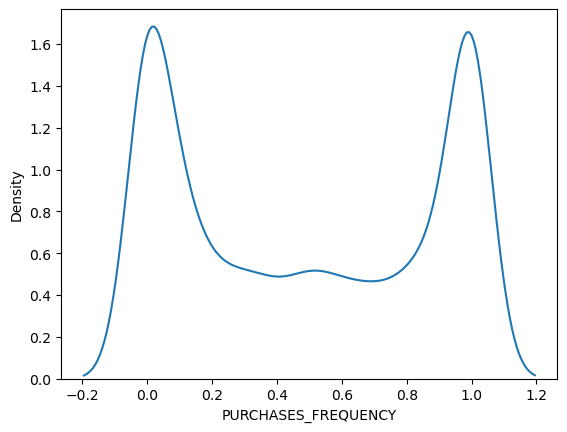

In [33]:
sns.kdeplot(df_3["PURCHASES_FREQUENCY"])

## Datos estadísticos de la variable frecuencia de compras: 

In [34]:
stats_2 = df_3.PURCHASES_FREQUENCY.describe()
stats_2

count    8949.000000
mean        0.490405
std         0.401360
min         0.000000
25%         0.083333
50%         0.500000
75%         0.916667
max         1.000000
Name: PURCHASES_FREQUENCY, dtype: float64

## Se crea un dataframe con las dos variables de interés con escalamiento min-max ya que con este escalamiento los datos de las dos variables están en el rango (-1,1) y así tienen una misma escala:

In [35]:
# creacion de un dataframe con las dos variables con escalamiento MIN-MAX

df_escal = pd.DataFrame({
    "scaled_0": scaled_0,
    "scaled_1": scaled_1
})
print(df_escal.head(10))

   scaled_0  scaled_1
0 -1.000000 -0.666666
1 -0.999776 -1.000000
2 -0.999553  1.000000
3 -0.999329 -0.833334
4 -0.999106 -0.833334
5 -0.998882  0.333334
6 -0.998659  1.000000
7 -0.998435  1.000000
8 -0.998212 -0.333334
9 -0.997988 -0.666666



## Grafica de los 2 clusters en una sola visualizacion:


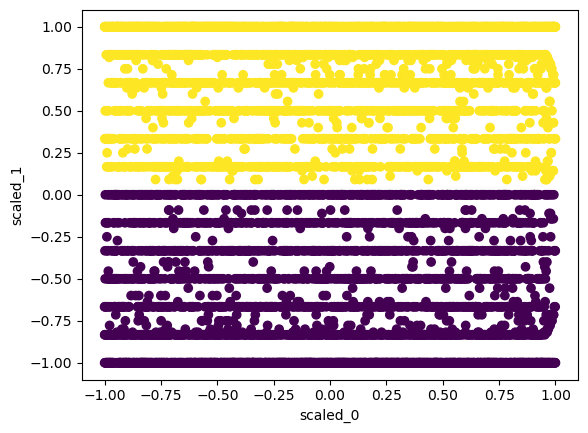

In [36]:
# grafica de 2 clusters escalados con el metodo MIN-MAX

from sklearn.cluster import KMeans


# Generar los labels de los clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_escal)
labels = kmeans.labels_

# Graficar los clusters
plt.scatter(df_escal["scaled_0"], df_escal["scaled_1"], c=labels)
plt.xlabel("scaled_0")
plt.ylabel("scaled_1")
plt.show()

## Aplicación del modelo DBSCAN con las dos variables de interés escaladas con el método min_max:

* Se obtuvo un coeficiente de silueta bajo (0.169).
* Por ello, este modelo no es viable.
* Escalar las variables no funcionó para obtener una buena métrica.
* Sin importar el valor de eps se van a obtener valores bajos para el coeficiente de silueta, como se ve en la gráfica.

valor de eps optimo 0.15999999999999998
coeficiente de silueta obtenido: [0.16928102570077166, 0.16928102570077166, 0.16928102570077166, 0.16928102570077166, 0.16928102570077166, 0.16928102570077166, 0.16928102570077166, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

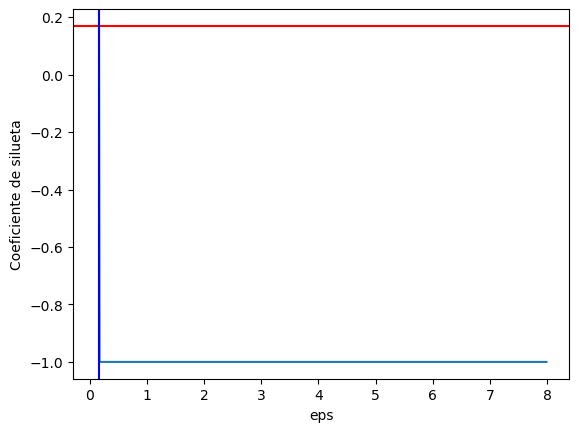

In [37]:
#  DBSCAN empleando la tecnica de la rodilla y el arange para encontrar el valor de eps y el coeficiente de silueta optimos

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from joblib import Parallel, delayed  

# Seleccionar las variables a utilizar
df_escal = df_escal[['scaled_0', 'scaled_1']]

# Iterar sobre valores de eps
eps_range = np.arange(0.1, 8, 0.01)

def calcular_coef_silueta(eps, df):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(df)
    labels = dbscan.labels_
    unique_labels = np.unique(labels)
    return silhouette_score(df, labels) if len(unique_labels) > 1 else -1

# Calcular el coeficiente de silueta para todos los valores de eps en paralelo
silhouette_scores = Parallel(n_jobs=32)(delayed(calcular_coef_silueta)(eps, df_escal) for eps in eps_range)

# Obtener la pendiente de la recta de tendencia
slope = np.gradient(silhouette_scores)

# Encontrar el punto de inflexión de la recta de tendencia
knee = np.argmax(np.abs(slope))

# Imprimir el valor de eps correspondiente al punto de inflexión
print('valor de eps optimo', eps_range[knee])

# coeficiente de silueta obtenido
print('coeficiente de silueta obtenido:',silhouette_scores)

# Visualizar los resultados
plt.plot(eps_range, silhouette_scores)
plt.xlabel('eps')
plt.ylabel('Coeficiente de silueta')
plt.axhline(y=np.max(silhouette_scores), color='red')
plt.axvline(x=eps_range[knee], color='blue')
plt.show()

## Aplicación del modelo K-MEANS con las dos variables de interés sin normalizar ni escalar:

* se inicializa el metodo con 3 clusters y se obtiene la grafica de numero de clusters versus distancia intracluster
al aumentar el numero de cluster disminuye la distancia intracluster




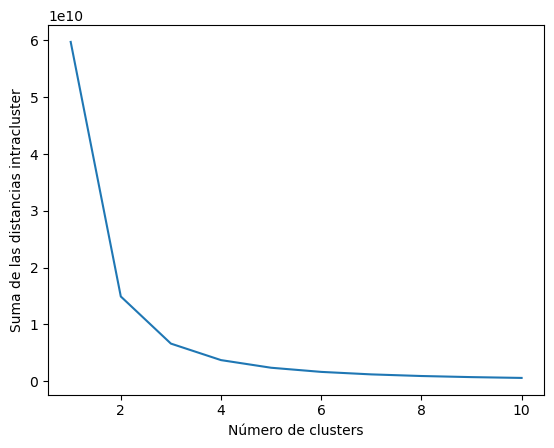

In [38]:
# metodo K-MEANS sin escalar ni normalizar las variables

# Importar las librerías necesarias
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Seleccionar las variables a utilizar
df_3 = df_3[['CUSTOMER_ID', 'PURCHASES_FREQUENCY']]

# Inicializar los parámetros
n_clusters = 3
max_iter = 500  

random_state = 12345 # Garantiza que el algoritmo k-means encuentre un resultado reproducible, independientemente de la plataforma o el entorno de ejecución utilizado

# Calcular la suma de las distancias intracluster para diferentes valores de k
wcss = []
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, n_init=50, max_iter=max_iter, random_state=random_state) 
    kmeans.fit(df_3) 
    wcss.append(kmeans.inertia_) 

# Graficar la suma de las distancias intracluster
plt.plot(range(1, 11), wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Suma de las distancias intracluster")
plt.show()




## Se grafica el numero de cluster versus el coeficiente de silueta:

* se observa que con 2 cluster se obtienen un buen coeficiente de silueta siendo este el mas apto segun la grafica

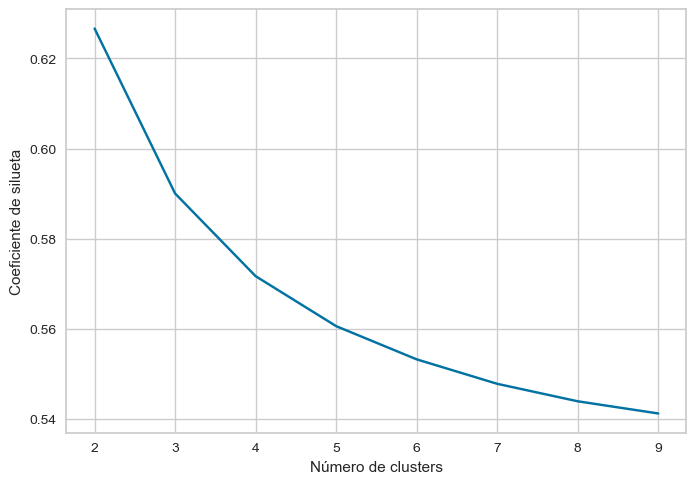

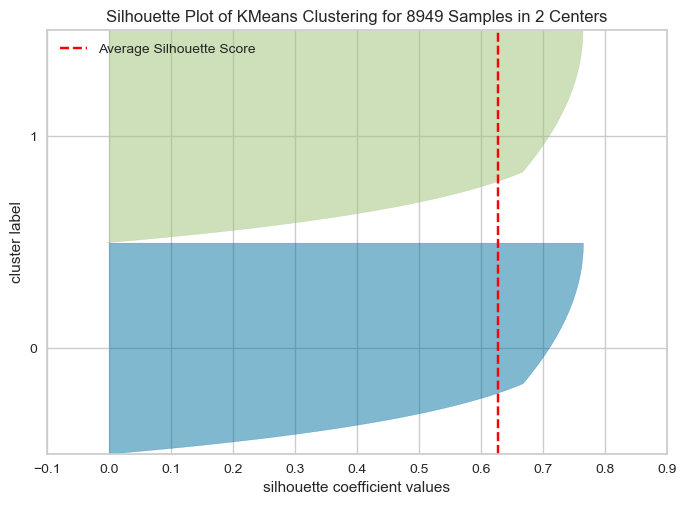

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8949 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
# grafica del coeficiente de silueta

from yellowbrick.cluster import SilhouetteVisualizer

# Definir un rango de valores para el número de clusters
n_clusters = np.arange(2, 10)

# Calcular el coeficiente de silueta para cada número de clusters
silhouette_scores = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    labels = kmeans.fit_predict(df_3)
    silhouette_scores.append(silhouette_score(df_3, labels))

# Graficar el coeficiente de silueta
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Número de clusters")
plt.ylabel("Coeficiente de silueta")
plt.show()

# grafica de la visualizacion del coeficiente de silueta

# Inicializar el modelo KMeans
km = KMeans(n_clusters=2)

# Inicializar el visualizador
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

# Visualizar el coeficiente de silueta
visualizer.fit(df_3)
visualizer.show()

## Resultados:
* se obtuvo un coeficiente de silueta bueno (0.62)
* se obtuvo una distancia intercluster de 14930787476.599924 que es relativamente alta
* el coeficiente de silueta es bueno ya que es mayor a 0.5 y cercano a uno
* aunque es relativamente elevado la distancia intercluster gracias al coeficiente de silueta este modelo es apto a implementar


In [40]:
# metodo K-MEANS fijando el numero de clusters a partir de la grafica del codo

# Elegir el número de clusters óptimo
k_opt = 2

# Entrenar el algoritmo K-means con el número de clusters óptimo
kmeans = KMeans(n_clusters=k_opt, n_init=50, max_iter=max_iter, random_state=random_state)
kmeans.fit(df_3)

# Obtener los centros de los clusters
centroids = kmeans.cluster_centers_

# Asignar a cada punto de datos el cluster al que pertenece
labels = kmeans.labels_


# Obtener la suma de las distancias intracluster
wcss = kmeans.inertia_

# Imprimir el valor de la suma de las distancias intracluster
print("Valor de la suma de las distancias intracluster:", wcss)
# Calcular el coeficiente silueta
silhouette_avg = silhouette_score(df_3, labels)

# Imprimir los resultados
print("Número de clusters óptimo:", k_opt)
print("Centros de los clusters:")
print(centroids)
print("Asignación de los puntos de datos a los clusters:")
print(labels)
print("Coeficiente silueta:", silhouette_avg)


Valor de la suma de las distancias intracluster: 14930787476.599924
Número de clusters óptimo: 2
Centros de los clusters:
[[6.71400000e+03 4.80819348e-01]
 [2.23950000e+03 4.99976351e-01]]
Asignación de los puntos de datos a los clusters:
[1 1 1 ... 0 0 0]
Coeficiente silueta: 0.6266510198498413


## Grafica de los cluster, resultado del metodo K-MEANS:

* por medio de la visualización se puede observar que los usuarios con mayor frecuencia de compra se encuentran desde   
aproximadamente el usuario numero 4500 en adelante 

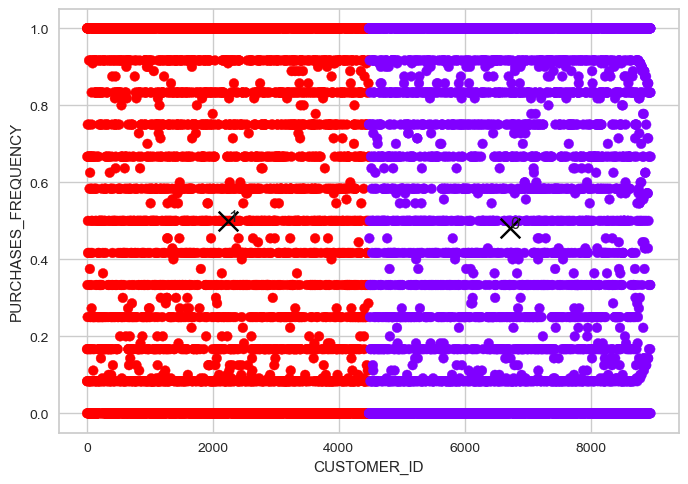

In [41]:
# Graficar los clusters

plt.scatter(df_3['CUSTOMER_ID'], df_3['PURCHASES_FREQUENCY'], c=labels, cmap='rainbow')
plt.xlabel('CUSTOMER_ID')
plt.ylabel('PURCHASES_FREQUENCY')

# Graficar los centroides
for i in range(k_opt):
    plt.scatter(centroids[i, 0], centroids[i, 1], color='black', marker='x', s=200)
    plt.annotate(str(i), (centroids[i, 0], centroids[i, 1]))

plt.show()

## Resultados de la visualizacion:
* se observa también a través de la visualización de la distribución de densidad:
* las frecuencias de compran con mayor repetición están con valores de aproximadamente 1 y con valores aproximadamente de 0

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

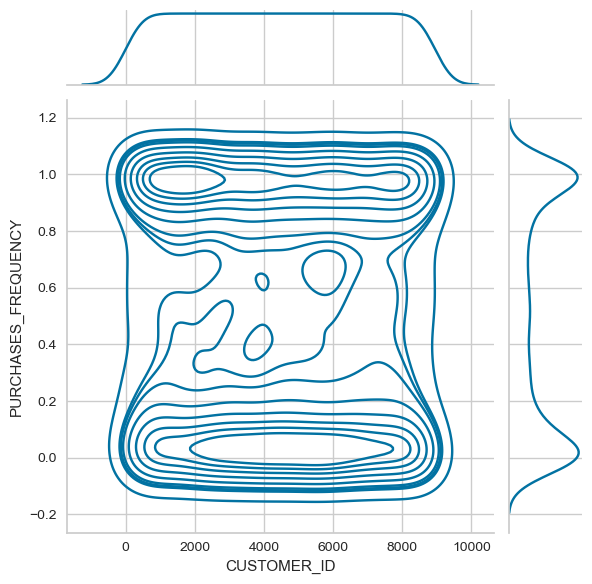

In [42]:
# Graficar el joinplot PARA CONOCER CUAL CLUSTER ES EL QUE ESTA SEGMENTANDO, A MAYOR # DE CLIENTES MAS FRECEUNCIA DE COMPRAS

sns.jointplot(data=df_2, x='CUSTOMER_ID', y='PURCHASES_FREQUENCY', kind='kde')

## Cluster jerarquico:
* a través de la implementación del cluster jerárquico se observa:
* el mejor coeficiente de silueta se obtiene con 2 cluster de acuerdo a la grafica 
* se obtiene un coeficiente de silueta de 0.59 siendo inferior al obtenido con el método de K-Means

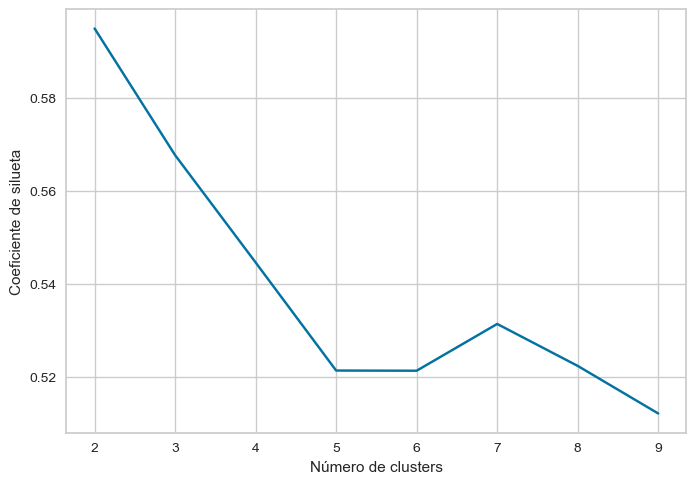

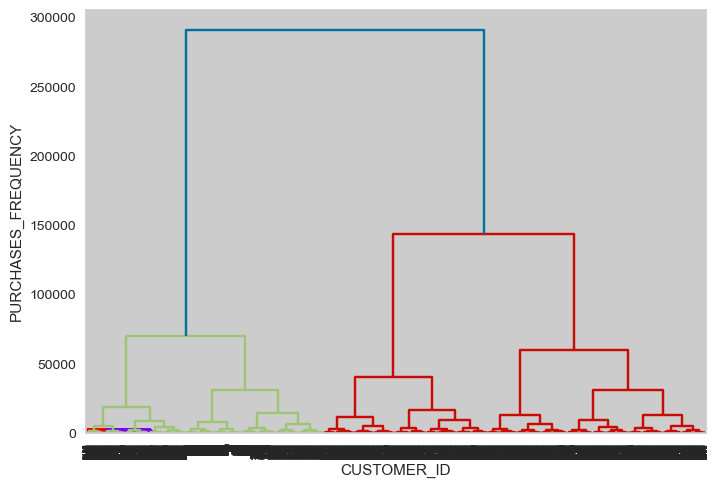

Número de clusters óptimo: 2
Coeficiente silueta: 0.594866418873743


In [47]:
# cluster jerarquico

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch


# Seleccionar las variables a utilizar
df_3 = df_3[['CUSTOMER_ID', 'PURCHASES_FREQUENCY']]

# Definir el rango de valores para el número de clusters
n_clusters = np.arange(2, 10)

# Definir el método de enlace
linkage = "ward"

# Calcular el coeficiente silueta para cada número de clusters
silhouette_scores = []
for n in n_clusters:
    hc = AgglomerativeClustering(n_clusters=n, linkage=linkage)
    hc.fit(df_3)
    labels = hc.labels_
    silhouette_avg = silhouette_score(df_3, labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el coeficiente silueta
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Número de clusters")
plt.ylabel("Coeficiente de silueta")
plt.show()

# Elegir el número de clusters óptimo
k_opt = np.argmax(silhouette_scores) + 2  

# Crear el dendrograma
dendrogram = sch.dendrogram(sch.linkage(df_3, method=linkage))

# Inicializar el modelo con el número de clusters óptimo
hc = AgglomerativeClustering(n_clusters=k_opt, linkage=linkage)

# Entrenar el modelo
hc.fit(df_3)

# Obtener los labels de los clusters
labels = hc.labels_

# Graficar los clusters
plt.scatter(df_3['CUSTOMER_ID'], df_3['PURCHASES_FREQUENCY'], c=labels, cmap='rainbow')
plt.xlabel('CUSTOMER_ID')
plt.ylabel('PURCHASES_FREQUENCY')
plt.show()

# Imprimir el número de clusters óptimo y el coeficiente silueta
print("Número de clusters óptimo:", k_opt)
print("Coeficiente silueta:", silhouette_scores[k_opt - 2])  

Clusters formados: [1 1 1 ... 2 2 2]


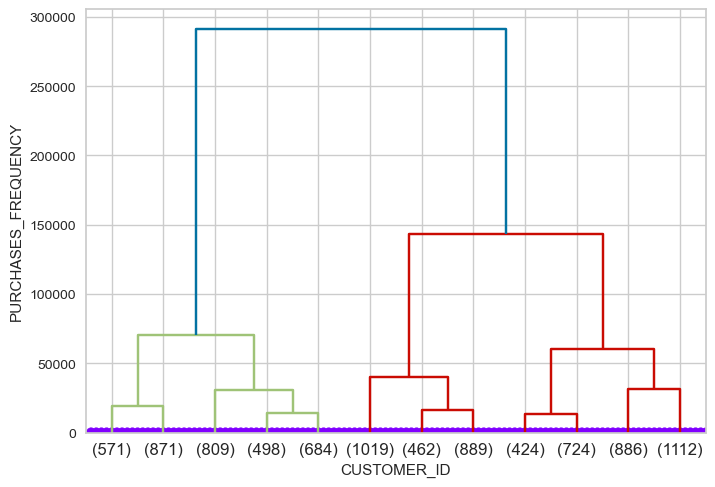

Número de clusters óptimo: 2
Coeficiente silueta: 0.594866418873743


In [48]:
# Crear el dendrograma de manera más detallada EMPLEANDO 12 RAMIFICACIONES

dendrogram = sch.dendrogram(sch.linkage(df_3, method=linkage), truncate_mode='lastp', p=12)

# Obtener los clusters formados con el número óptimo de clusters
clusters = sch.fcluster(sch.linkage(df_3, method=linkage), k_opt, criterion='maxclust')

# Imprimir los clusters formados
print("Clusters formados:", clusters)

# Graficar los clusters con colores correspondientes a los clusters formados
plt.scatter(df_3['CUSTOMER_ID'], df_3['PURCHASES_FREQUENCY'], c=clusters, cmap='rainbow')
plt.xlabel('CUSTOMER_ID')
plt.ylabel('PURCHASES_FREQUENCY')
plt.show()

# Imprimir el número de clusters óptimo y el coeficiente silueta
print("Número de clusters óptimo:", k_opt)
print("Coeficiente silueta:", silhouette_scores[k_opt - 2])  

## CONCLUSIONES:

* de acuerdo a la implementación de los tres modelos para segmentar los clientes de acuerdo a la frecuencia de compras el de mejores resultados fue el de el modelo K-MEANS con 0.62 de coeficiente de silueta y con un resultado de distancia intracluster relativamente alta

* de acuerdo a los resultados obtenidos desde aproximadamente el usuario 4500 en adelante se pueden generar diversas estrategias de publicidad enfocadas en estos clientes que se caracterizan por tener mayor frecuencia de compras

* al igual para estos usuarios se puede también generar estrategias de publicidad para incentivar la frecuencia de compran ya que en estos usuarios se concentran los que tienen una frecuencia de compra alrededor de cero y de cero

* se pueden para estos usuarios combinar publicidad para usuarios con alta frecuencia de compras como con baja frecuencia de compras 
* se acuerdo a lo anterior no es necesario enviar la publicidad al total de los usuarios sino a aproximadamente a la mitad de los usuarios
